# Coint Toss

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
toss = np.random.choice([0,1])
print(toss)

1


In [52]:
N = 100 # number of tosses
toss_list = []
for i in range(N):
    toss_list.append(np.random.choice([0,1]))
toss = np.array(toss_list)
print(toss.sum())

56


0.5019 0.04965269378392274


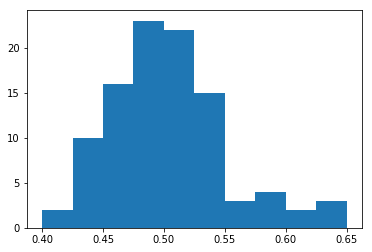

In [83]:
N = 100 # number of tosses
M = 100 # number of numerical experiments
nheads = []
for j in range(M):
    toss_list = []
    for i in range(N):
        toss_list.append(np.random.choice([0,1]))
    toss = np.array(toss_list)
    nheads.append( toss.sum() / N )
nheads = np.array(nheads)

plt.hist(nheads)
print(nheads.mean(),nheads.std())

# Randomness


What type of problems can we solve with the help of random numbers?

We can compute (potentially) complicated averages:

*   How much my stock/option portfolio is going to be worth?
*   What are my odds to win a certain competition?


### Random Number Generators

*   Computers are deterministic - operations are reproducible
*   How do we get random numbers out of a deterministic machine?



In [ ]:
import numpy as np

In [ ]:
np.random.rand(10)

In [ ]:
for x in range(0, 20):
    numbers = np.random.rand(6)
    #print(numbers)

They all seem random correct? Let's try to fix something called **seed** using  
np.random.seed(10)

What do you observe? 

Let's see what this seed is...

## Pseudo-random Numbers

* Numbers and sequences appear random, but they are actually reproducible
* Great for algorithm developing and debugging
* How truly "random" are these numbers?


## Linear congruential generator

Given the parameters $a$, $c$, $m$ and $s$, where $s$ is the seed value, this algorithm will generate a sequence of pseudo-random numbers:

$x_o = s $

$x_{n+1} = (a x_n + c) mod(m)$

In [ ]:
s = 3 # seed
a = 37# multiplier
c = 2 # increment
m = 19# modulus

In [ ]:
n = 60
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(x,'.')

Notice there is a period, when numbers eventually start repeating.  One of the advantages of the LCG is that by using appropriate choice for the parameters, we can obtain known and long periods.

Check here https://en.wikipedia.org/wiki/Linear_congruential_generator for a list of commonly used parameters of LCGs.

Let's try using the parameters from 
[Numerical recipes](https://en.wikipedia.org/wiki/Numerical_Recipes)

In [ ]:
s = 8
a = 1664525
c = 1013904223
m = 2**32

n = 300
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m

plt.plot(x,'.')

"Good" random number generators are efficient, have long peiods and are portable.

# Random Variables

Think of a random variable $X$ as a function that maps the outcome of an unpredictable (random) processses to numerical quantities.

For example:

* $X$ = the face of a bread when it falls on the ground. The random value can abe the "buttered" side or the "not buttered" side
* $X$ = value that appears on top of dice after each roll

We don't have an exact number to represent these random processes, but we can get something that represents the **average** case. To do that, we need to know the likelihood of each individual value of $X$.

### Coin toss

Random variable $X$: result of a coin toss

In each toss, the random variable can take the values $x_1 = 0$ (tail) and $x_2 = 1$ (head), and each $x_i$ has probability $p_i = 0.5$. 

The **expected value** of a discrete random variable is defined as:

$$ E(x) = \sum_{i=1}^{m} p_i x_i $$

Hence for a coin toss we have:

$$ E(x) = 1(0.5) + 0(0.5) = 0.5 $$

### Roll Dice

Random variable $X$: value that appears on top of the dice after each roll

In each toss, the random variable can take the values $x_i = 1,2,3,...,6$ and each $x_i$ has probability $p_i = 1/6$. 

The **expected value** of the discrete random variable is defined as:


#  Monte Carlo Methods

Monte Carlo methods are algorithms that rely on repeated random sampling to approximate a desired quantity.

### Simulating a coin toss experiment

We want to find the probability of heads when tossing a coin. We know the expected value is 0.5. Using Monte Carlo with N samples (here tosses), our estimate of the expected value is:

$$E = \frac{1}{N}\sum_{i=1}^N f(x_i) = \frac{1}{N}\sum_{i=1}^N x_i$$ 

where $x_i = 1$ if the toss gives head.

Let's toss a "fair" coin N times and record the results for each toss.

But first, how can we simulate one toss?

Note that if we run the code snippet above again, it is likely we will get a different result. What if we run this many times? 

In [ ]:
print(nheads.mean(),nheads.std())

What happens when we increase the number of numerical experiments?

### Approximating integrals

To approximate an integration

$$ A = \int_{x_1}^{x_2} \int_{y_1}^{y_2} f(x,y) dx dy $$

we sample points uniformily inside a domain $D = [x_1,x_2] \times [y_1,y2]$, i.e. we let $X$ be a uniformily distributed random variable on $D$. Using Monte Carlo with N sample points, our estimate for the expected value (that a sample point is inside the circle) is:

$$ S_N = \frac{1}{N} \sum_{i=1}^{N} f(X_i) $$

which gives the approximate for the integral:

$$ A_N = (x_2 - x_1)(y_2-y_1) \frac{1}{N} \sum_{i=1}^{N} f(X_i) $$

Law of large numbers:

as $N \rightarrow \infty$, the sample average $S_N$ converges the the expected value $E(X)$ and hence $A_N \rightarrow A$


We will use Monte Carlo Method to approximate the area of a circle of radius R = 1.

Let's start with a uniform distribution on the unit square  [0,1]×[0,1] . Create a 2D array samples of shape (2, N):

In [ ]:
N = 10**2
samples = np.random.rand(2, N)

Scale the sample points "samples", so that we have a uniform distribution inside a square $[-1,1]\times [-1,1]$. Calculate the distance from each sample point to the origin $(0,0)$


In [ ]:
xy = samples * 2 - 1.0 # scale sample points
r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius

In [ ]:
plt.plot(xy[0,:], xy[1,:], 'k.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

We then count how many of these points are inside the circle centered at the origin.

And the approximated value for the area is:

We can assign different colors to the points inside the circle and plot (just for vizualization purposes).

In [ ]:
plt.plot(xy[0,np.where(incircle)[0]], xy[1,np.where(incircle)[0]], 'b.')
plt.plot(xy[0,np.where(incircle==False)[0]], xy[1,np.where(incircle==False)[0]], 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

Combine all the relevant code above, so we can easily run this numerical experiment for different sample size N.

In [ ]:
#clear
def determine_area(N = 10**2):
    samples = np.random.rand(2, N)
    xy = samples * 2 - 1.0 # scale sample points
    r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius
    incircle = (r <= 1)
    count_incircle = incircle.sum()
    A_approx = (2*2) * (count_incircle)/N
    return A_approx

In [ ]:
determine_area(10**4)

Perform the same above, but now store the approximated area for different N, and plot:

The approximated area is:

In [ ]:
plt.plot(A_approx)

Which as expected gives an approximation for the number $\pi$, since the circle has radius 1. Let's plot the error of our approximation:

In [ ]:
plt.loglog(N_samples, np.abs(A_approx - np.pi), '.')
plt.xlabel('n')
plt.ylabel('error')

In [ ]:

plt.loglog(N_samples, np.abs(A_approx - np.pi), '.')
plt.xlabel('n')
plt.ylabel('error')

plt.loglog(N_samples, 1/N_samples**2, '.')
plt.loglog(N_samples, 1/N_samples, 'r')
plt.loglog(N_samples, 1/np.sqrt(N_samples), 'm')

### Approximating probabilities of a Poker game

What is the probability of winning a hand of Texas Holdem for a given starting hand?

Assumptions for this example:
- You are playing against only one player (the opponent)
- Both players stay until the end of a game (all 5 dealer cards), so players do not fold.

Monte Carlo simulation: for a given "starting hand" that we wish to obtain the winning probability, generate a set of N games and use the Texas Holdem rules to decide who wins (starting hand, opponent or there is a tie).

A game is a set of 7 random cards:  2 cards for opponent + 5 cards for the dealer.

For example, suppose the starting hand is 5 of clubs and 4 of diamonds. You perform N=1000 games, and counts 350 wins, 590 losses and 60 ties. Your numerical experiment estimated a probability of winning of 35%.

**This is your first MP!**








# Playing around with Random Number Generators

In [1]:
import numpy as np

In [6]:
np.random.rand(10)

array([0.16352153, 0.76995462, 0.47245686, 0.29565859, 0.59586732,
       0.51465913, 0.68877592, 0.00980352, 0.47749462, 0.88138491])

In [14]:
np.random.seed(50)
for x in range(0, 20):
    numbers = np.random.rand(6)
    print(numbers)

[0.49460165 0.2280831  0.25547392 0.39632991 0.3773151  0.99657423]
[0.4081972  0.77189399 0.76053669 0.31000935 0.3465412  0.35176482]
[0.14546686 0.97266468 0.90917844 0.5599571  0.31359075 0.88820004]
[0.67457307 0.39108745 0.50718412 0.5241035  0.92800093 0.57137307]
[0.66833757 0.05225869 0.3270573  0.05640164 0.17982769 0.92593317]
[0.93801522 0.71409271 0.73268761 0.46174768 0.93132927 0.40642024]
[0.68320577 0.64991587 0.59876518 0.22203939 0.68235717 0.8780563 ]
[0.79671726 0.43200225 0.91787822 0.78183368 0.72575028 0.12485469]
[0.91630845 0.38771099 0.29492955 0.61673141 0.46784623 0.25533891]
[0.83899589 0.1786192  0.22711417 0.65987645 0.47911625 0.07344734]
[0.13896007 0.11230718 0.47778497 0.54029623 0.95807105 0.58379231]
[0.52666409 0.92226269 0.91925702 0.25200886 0.68263261 0.96427612]
[0.22696165 0.7160172  0.79776011 0.9367512  0.8537225  0.42154581]
[0.00543987 0.03486533 0.01390537 0.58890993 0.3829931  0.11481895]
[0.86445401 0.82165703 0.73749168 0.84034417 0.4

# Random Numbers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
s = 3 # seed
a = 10 #37 #10 # multiplier
c = 2 # increment
m = 19 # modulus

In [12]:
n = 60
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m
#print(x)

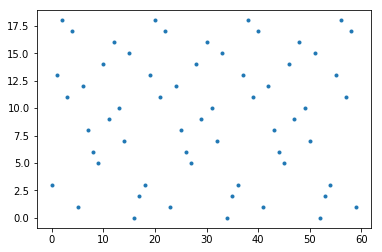

In [13]:
plt.plot(x,'.')

In [14]:
s = 8
a = 1664525
c = 1013904223
m = 2**32

In [15]:
n = 300
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m
#print(x)

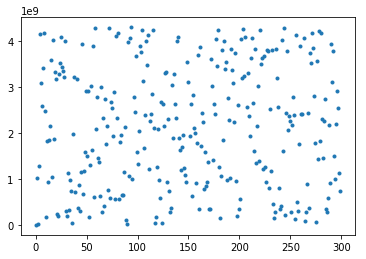

In [16]:
plt.plot(x,'.')

# Ratio of a Circle to a Box

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
np.random.seed(908)  # a not-so-random starting seed

Let's start with a uniform distribution on the unit square  [0,1]×[0,1] . Create a 2D array samples of shape (2, nsamples):

In [3]:
nsamples = 10**5
samples = np.random.rand(2, nsamples)

Scale the sample points "samples", so that we have a uniform distribution inside a square $[-1,1]\times [-1,1]$. Calculate the distance from each sample point to the origin $(0,0)$

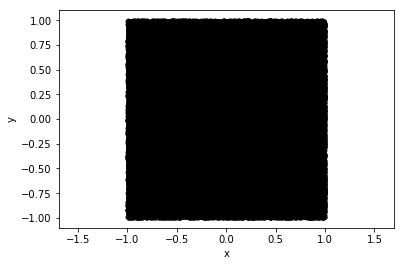

In [4]:
xy = samples * 2 - 1.0 # scale sample points
r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius

## talk about here how we can reduce the calculation by removing the sqrt
plt.plot(xy[0,:], xy[1,:], 'k.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

If the distance is less than 1 (radius of the circle), then the sample point is inside the circle.

In [5]:
incircle = (r <= 1.0)
n = np.arange(1, nsamples+1)
incircle

array([ True,  True,  True, ..., False, False,  True])

In [6]:
countincircle = 4 * incircle.cumsum() / n
countincircle

array([4.        , 4.        , 4.        , ..., 3.13634273, 3.13631136,
       3.13632   ])

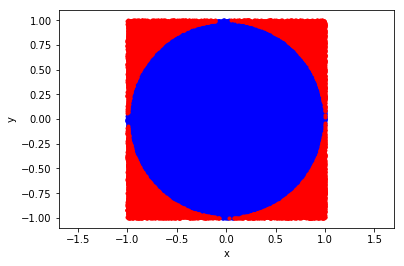

In [7]:
plt.plot(xy[0,np.where(incircle)[0]], xy[1,np.where(incircle)[0]], 'b.')
plt.plot(xy[0,np.where(incircle==False)[0]], xy[1,np.where(incircle==False)[0]], 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

## Aproximation for $\pi$ for increasing values of `n` (number of sample points)

The approximation for $\pi$ when we use `n` sample points is:

In [8]:
pi_approx = countincircle[-1]
print(pi_approx)

3.13632


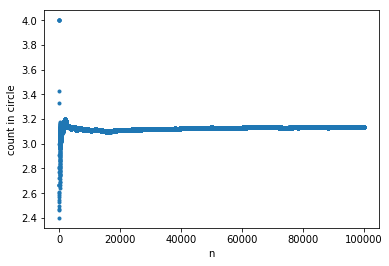

In [9]:
plt.plot(n, countincircle, '.')
plt.xlabel('n')
plt.ylabel('count in circle');


Text(0, 0.5, 'error')

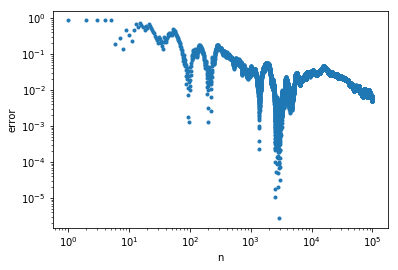

In [10]:
error = np.abs(countincircle - np.pi)
plt.loglog(n, error, '.')
plt.xlabel('n')
plt.ylabel('error')

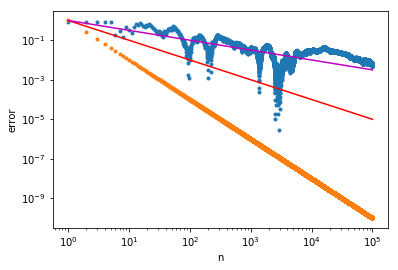

In [11]:
error = np.abs(countincircle - np.pi)
plt.loglog(n, error, '.')
plt.xlabel('n')
plt.ylabel('error')

plt.loglog(n, 1/n**2, '.')
plt.loglog(n, 1/n, 'r')
plt.loglog(n, 1/np.sqrt(n), 'm')